# Hydrodynamika
- Počítáme s ustáleným proděním
- Rcyhlost zůstává konstantní 
- Proudnice - čáry, k nimž je rychlost neustále tečnou - jednoduše čáry, na kterých má kapalina stejnou rychlost.
- Uvažujeme též, že průtok se zachovává(důsledek zachovávání hmotnosti), čili platí, že: $S_1 v_1 = S_2 v_2$

## Bernoulliho rovnice
Platí pro ideální kapalinu a je to v podstatě zákon zachování energie vztažený na objem. Má tvar:
$$
\frac{1}{2} \rho v^{2} + \rho g h + p = konst.
$$
Často se používá v kombinaci s rovnicí kontinuity. 

## Příklady aplikací
Plynový laboratorní kahan(Do kahanu vháníme plyn, přičemž si můžeme všimnout, že v určitém bodě  je kahan zúžený - zde z rovnice kontinuity bude plyn téct rychlejí a z Bernoulliho rovnice nám vyplyne, že se sníží tlak, díky čemuž se plyn prokysličí a lépe hoří). 

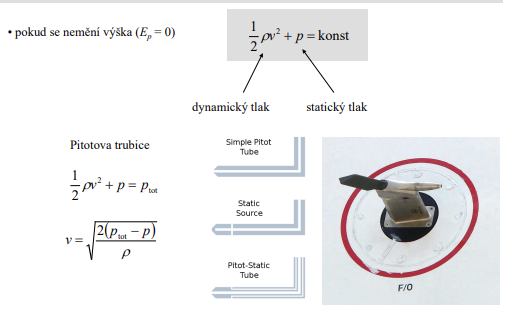

## Proudění reálné kapaliny
Ideální kapalina má stejnou rychlost ve všech místech prřezu, avšak ta skutečná má v důsledku tření poněkud rozlišný profil rychlosti. Nejrychlejší je kapalina ve svém středu a nejpomalejší právě u krajů, kde dochází k mnohem více srážkám. Míru tohoto zpomalování popisujeme pomocí dynamické viskozity $\Eta = Ae^{\frac{B}{T}}$, a měříme jí například pomocídvou rovnoběžných destiček mezi nimiž je zkoumaná kapalina. Pro sílu potřebnou k posunutí jedné destičky potom platí:
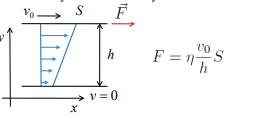
# Zbytek dobereme ještě někdy před zkouškou, tuším


# Simulaci k proudění a reálnému plynu sice mám, ale kód je součástí výzkumného projektu, a tak si nejsem jistý, zda jej mohu nahrát na github. Pokusím se vytvořit jinou simulaci.

# Lattice-Boltzmann metoda simulace částic
Obyčejně pro simulace používáme Navier-Stokseovy rovnice. To je dost složité a nemám na to prozatím dostatečný skill, pročež zvolím Lattice Boltzmannovu(mřížkovou) metodu, která se mi zdá snazší,přestože není ani zdaleka tak přesná.
### Podstata metody
Rozdělení  mřížky, na které nás zajímá chování kapaliny na drobné čtverečky mezi jejichž hranami jsou další body tak, aby částice uvnitř tohoto čtverečku mohla nabývat rychlost ve směru těchto 9 pomyslných směrů. Popis chování částic uvnitř
### Algoritmus a jeho části
Jakousi existenci molekul uvnitř simulace popisujeme pomocí nějaké funkce dvou proměnných $f_i(\vec{x}, t)$, která musí splňovat následující rovnost 
$$
(\partial_t + v \nabla) f = -\frac{f - f^{eq}}{\tau}
$$
Kde $\tau$ představuje čas, na kterém dochází ke srážce. $F^e$ je v rovnici potom stav, ke kterému systém tíhn Pro ilustraci z čeho jsem vycházel při odvození rovnosti:
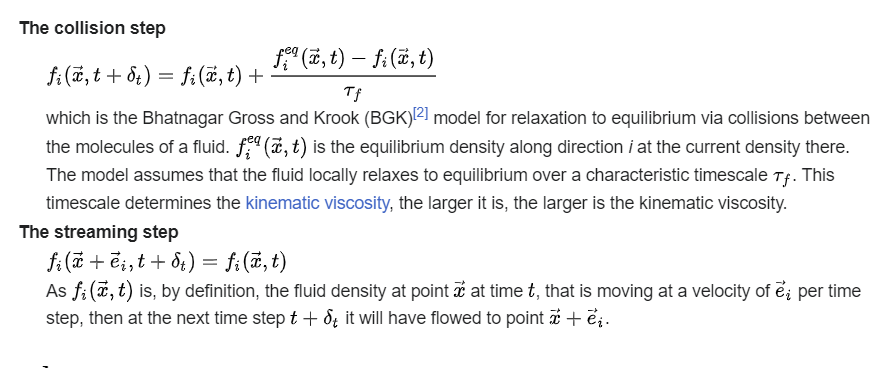
Diskrezizujme naší rovnost na:
$$
F_i(x_i + v_i \Delta t ,t + \Delta t) - F_i(x_i,t) = -\frac{F_i(x_i,t)-F_{i}^{eq}(x_i,t)}{\tau}
$$

In [1]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica")

x = zip(a, b)
x

In [2]:
# můj kód 
# Každá buňka má 9 dimenzí

from itertools import permutations
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from numba import jit, njit

def pokus_o_jit():
    cell_numberx = 500
    cell_numbery = 200
    tau = 0.6
    t_sample = 1000
    cell_dim = 9
    # cell_velocities = np.array([perm for perm in product([1,-1,0],repeat=2)]) #funguje, lecgou nebylo kompatibilní s jitem
    # weight_nodes =  np.array([1/36,1/36,1/9,1/36,1/36,1/9,1/9,1/9,4/9])#Odvození po mně po mě fakt nemůže chtít, je to něco jako pravděpodobnosti
    F = np.ones([cell_numbery,cell_numberx,cell_dim]) + 0.2*np.random.randn(cell_numbery,cell_numberx,cell_dim)
    F[:,:,3] = 2.3 # počáteční rychlost tekutiny, která bude obtékat těleso
    # boundary part
    a = ("John", "Charles", "Mike")
    b = ("Jenny", "Christy", "Monica")
    # cell_vx = cell_velocities[:,0]
    # cell_vy = cell_velocities[:,1]
    
    cell_vx = np.array([0, 0, 1, 1, 1, 0,-1,-1,-1])
    cell_vy = np.array([0, 1, 1, 0,-1,-1,-1, 0, 1])
    weight_nodes = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36]) # sums to 1

    seznam_pro_animaci = [1 for x in range(t_sample)]
    seznam_pro_animaci2 = []
    x = zip(a, b)
    print(x)
    prekazka_matrix = np.full((cell_numbery,cell_numberx),False)
    x_prekazka = 1.5*cell_numberx//5
    y_prekazka = cell_numbery//2
    radius = 25

    # Nejjednodušší případ koule
    for y in range(0,cell_numbery):
        for x in range(0,cell_numberx):
            if (np.sqrt(np.dot([x-x_prekazka,y-y_prekazka],[x-x_prekazka,y-y_prekazka]))<=radius):
                
                prekazka_matrix[y][x] = True
    plt.imshow(prekazka_matrix)
    for dt in range(t_sample):
        # obtékání, protékání, míchání
                
        for i,cellx,celly in zip(range(cell_dim),cell_vx,cell_vy):
            F[:,:,i] = np.roll(F[:,:,i],cellx,axis=1)
            F[:,:,i] = np.roll(F[:,:,i],celly,axis=0)
        prekazka = F[prekazka_matrix,:] #označím body nody překážky
        prekazka = prekazka[:,[0,5,6,7,8,1,2,3,4]]

        #prekazka = prekazka[:,[5,4,6,1,0,2,7,6,8]] #odskočení, pokud teče kolem překážky
        # začátek části srážek
        
        rho = np.sum(F,2)
        
        ux = np.sum(F* cell_vx,2)/rho #moment
        uy = np.sum(F * cell_vy,2)/rho

        F[prekazka_matrix,:] = prekazka
        ux[prekazka_matrix] = 0 # tam, kde se máme tu překážkj se nic nehýbe
        uy[prekazka_matrix] = 0  
        Feq = np.zeros(F.shape) # odvození je v článku
        
        for i,cellx,celly,m in zip(range(cell_dim),cell_vx,cell_vy,weight_nodes):
            #Feq[:,:,i] = rho *m * (1+3*(cellx*ux + celly*uy)+(9/2)*(cellx*ux+celly*uy)**2 - (3/2)*(ux**2+uy**2))
            Feq[:,:,i] = rho * m * ( 1 + 3*(cellx*ux+celly*uy)  + 9*(cellx*ux+celly*uy)**2 /2 - 3*(ux**2+uy**2)/2 )
        F =  F + -(1/tau)*(F-Feq)
        seznam_pro_animaci[dt] = np.sqrt(ux**2 + uy**2) #velikosti rychlostí
        cast1= ux[2:,1:-1]-ux[0:-2,1:-1]
        cast2 = uy[1:-1,1:2:]-uy[1:-1,0:-2]
        dohromady = cast1-cast2
        seznam_pro_animaci2.append(dohromady)
        
    return(seznam_pro_animaci,seznam_pro_animaci2)

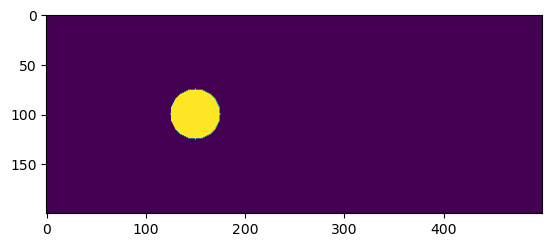

In [3]:
skip = 10
animace,animacecurl = pokus_o_jit()

In [13]:
# pokus 2
Nx = 400
Ny = 100
tau = 0.53
Nt = 1000
seznam_pro_animaci_porovnani = [1 for x in range(Nt)]
seznam_pro_animaci_porovnani2 = []
NL = 9
cxs = np.array([0, 0, 1, 1, 1, 0,-1,-1,-1])
cys = np.array([0, 1, 1, 0,-1,-1,-1, 0, 1])
weights = np.array([4/9,1/9,1/36,1/9,1/36,1/9,1/36,1/9,1/36]) # sums to 1
F = np.ones([Ny,Nx,NL])+0.1*np.random.randn(Ny,Nx,NL)
F[:,:,3]= 2.3
cylinder = np.full([Ny,Nx],False)
def distance(x1,y1,x2,y2):
    return(np.sqrt((x1-x2)**2 + (y1-y2)**2))
for y in range(0,Ny):
    for x in range(0,Nx):
        if distance(Nx//4,Ny//2,x,y)<=25:
            cylinder[y][x] = True
            
for dt in range(Nt):
    for i,cx,cy in zip(range(NL),cxs,cys):
        F[:,:,i] = np.roll(F[:,:,i],cx,axis=1)
        F[:,:,i] = np.roll(F[:,:,i],cy,axis=0)
    bndryF = F[cylinder,:]
    bndryF = bndryF[:,[0,5,6,7,8,1,2,3,4]]
    
    rho = np.sum(F,2)
    ux = np.sum(F*cxs,2)/rho
    uy = np.sum(F*cys,2)/rho
    
    F[cylinder,:] = bndryF
    ux[cylinder] = 0
    uy[cylinder] = 0
    
    Feq = np.zeros(F.shape)
    for i, cx, cy,w in zip(range(NL),cxs,cys,weights):
        Feq[:,:,i] = rho * w * ( 1 + 3*(cx*ux+cy*uy)  + 9*(cx*ux+cy*uy)**2 /2 - 3*(ux**2+uy**2)/2 )
    
    F =  F + -(1/tau)*(F-Feq)
    
    seznam_pro_animaci_porovnani[dt] = np.sqrt(ux**2 + uy**2) #velikosti rychlostí
    cast1= ux[2:,1:-1]-ux[0:-2,1:-1]
    cast2 = uy[1:-1,1:2:]-uy[1:-1,0:-2]
    dohromady = cast1-cast2
    seznam_pro_animaci_porovnani2.append(dohromady)
        

In [ ]:
# vytvoření animace a zvuku
def animate(i,skip=10):
    ax.cla
    ax.imshow(animace[i*skip],cmap="bwr") # aby to nelétalo

fig, ax = plt.subplots(1,1) # otravné tvoření rámce animace
ani = animation.FuncAnimation(fig,animate,frames=100,interval=10) 
ani.save("obtékání.gif",writer="pillow",fps=30)

In [ ]:
def animate(i,skip=10):
    ax.cla
    ax.imshow(animacecurl[i*skip],cmap="bwr") # aby to nelétalo

fig, ax = plt.subplots(1,1) # otravné tvoření rámce animace
ani = animation.FuncAnimation(fig,animate,frames=100,interval=10) 
ani.save("obtékánícurl.gif",writer="pillow",fps=30)

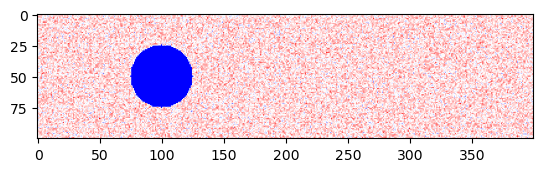

In [14]:
def animate(i,skip=10):
    ax.cla
    ax.imshow(seznam_pro_animaci_porovnani[i*skip],cmap="bwr") # aby to nelétalo

fig, ax = plt.subplots(1,1) # otravné tvoření rámce animace
ani = animation.FuncAnimation(fig,animate,frames=100,interval=10) 
ani.save("obtékání2funkce.gif",writer="pillow",fps=30)

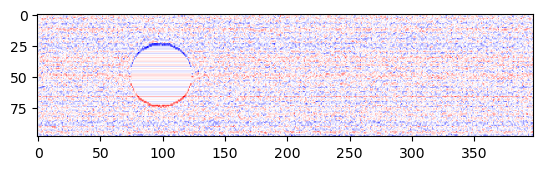

In [15]:
def animate(i,skip=10):
    ax.cla
    ax.imshow(seznam_pro_animaci_porovnani2[i*skip],cmap="bwr") # aby to nelétalo

fig, ax = plt.subplots(1,1) # otravné tvoření rámce animace
ani = animation.FuncAnimation(fig,animate,frames=100,interval=10) 
ani.save("obtékání2funkcecurl.gif",writer="pillow",fps=30)